# <span style="color:green"> ESERCITAZIONE 11 </span>
## <span style="color:blue">  Machine Learning - Keras neural network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

## <span style="color:blue"> Svolgimento </span>

### Funzionamento di una rete neurale

L'idea alla base delle reti neurali e, più in generale, del machine learning, è quella di non fornire alla macchina un algoritmo predefinito per risolvere un problema, ma di addestrare la macchina mostrandole molti dati di input con i corrispondenti dati di output, in modo che la macchina stessa possa creare il miglior "algoritmo" per predire i dati di output futuri.

Una rete neurale è costituita da unità elementari chiamate neuroni.

Un neurone prende ciascun dato di input $x_i$, gli attribuisce un peso $w_i$, e poi aggiunge al risultato un parametro $b$ chiamato bias.
Pertanto, il singolo neurone è caratterizzato da due parametri: il vettore dei pesi e il bias.

Per il funzionamento della rete è fondamentale scegliere un'opportuna funzione di attivazione $f(z)$, dove $z=x \cdot w +b $.
Il valore predetto con la funzione di attivazione viene poi confrontato con l'output del test della rete attraverso una funzione di costo (solitamente MSE nei problemi di fitting).

Infine, la rete troverà i migliori parametri che minimizzano la funzione di costo.

### Training

La rete necessita' pertanto di molte coppie di dati di input e di output (x,y) per essere allenata: questi dati vengono di solito divisi in dati di train, con cui la rete verra' allenata, e in dati di test, con la quale si verificheranno le prestazioni della rete e la sua capacita' di lavorare con dati nuovi. In generale il rapporto tra "training data" e "validation data" è di almeno 9 a 1.

### Suddivisione in epoche ed overfitting

I dati sono divisi in blocchi detti "epoche", all' interno di ogni epoca vengono utilizzati metodi a gradiente decrescente (noi useremo il SGD: stochastic gradient descendant) per cercare di minimizzare le funzioni di costo e trovare i parametri della rete migliore.

Un problema in cui e' possibile incorrere e' quello dell'overfitting: quando si usando epoche molto lunghe, la rete potrebbe basarsi troppo sui dati di train e non essere quindi in grado di adattarsi a dati nuovi e diversi da quelli con cui e' stata allenata. Per evitare questo problema in questa esercitazione si e' deciso di mescolare i dati all'inizio di ogni epoca (shuffle).

Di seguito vengono illustrati gli esiti di diversi test della rete, effettuati modificando leggermente alcuni parametri come: il numero di dati di training, il numero di epoche e l'errore $\sigma$. 


### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

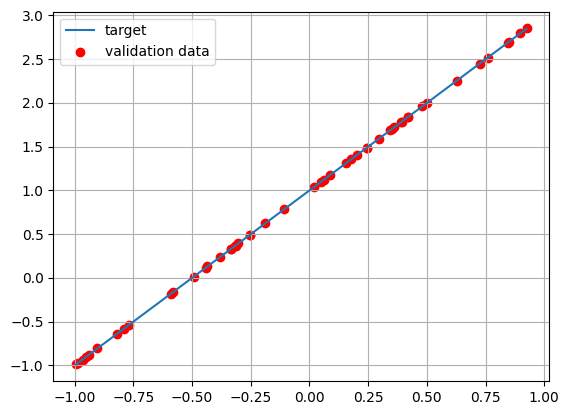

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8223 - mse: 1.8223 - val_loss: 1.2403 - val_mse: 1.2403
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2851 - mse: 1.2851 - val_loss: 0.8737 - val_mse: 0.8737
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9090 - mse: 0.9090 - val_loss: 0.6390 - val_mse: 0.6390
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6157 - mse: 0.6157 - val_loss: 0.4817 - val_mse: 0.4817
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5075 - mse: 0.5075 - val_loss: 0.3705 - val_mse: 0.3705
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3889 - mse: 0.3889 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3080 - mse: 0.3080 - val_loss: 0.2297 - val_mse: 0.2297
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2420 - mse: 0.2420 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1942 - mse: 

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [9]:
# return weights and biases
model.get_weights()

[array([[1.9316498]], dtype=float32), array([0.99917954], dtype=float32)]

In [13]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mse: 0.0014  

Test loss: 0.001485058688558638
Test accuracy: 0.001485058688558638


In [14]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 - mse: 0.0014 

Test loss: 0.001485058688558638
Test accuracy: 0.001485058688558638


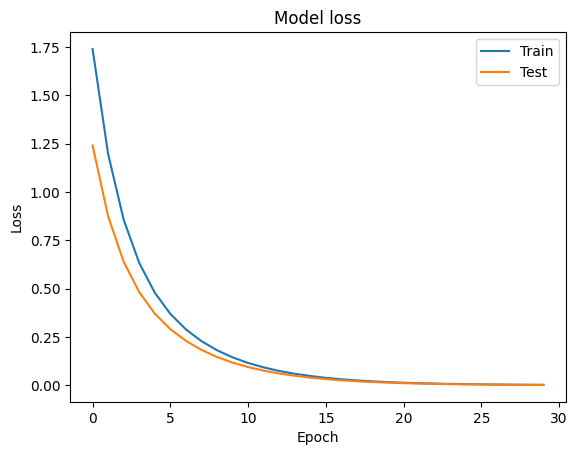

In [15]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


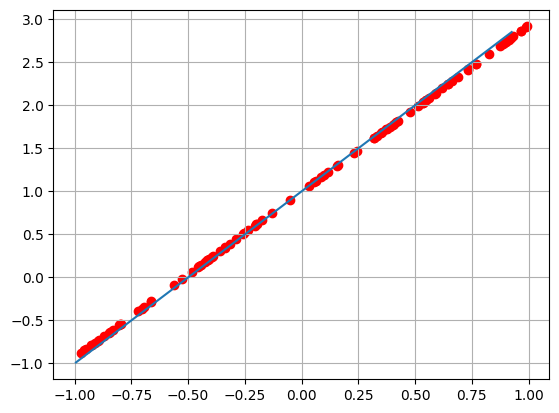

In [16]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [17]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np


# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.9 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [18]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=25, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1137 - mse: 2.1137 - val_loss: 2.2410 - val_mse: 2.2410
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9679 - mse: 1.9679 - val_loss: 1.7726 - val_mse: 1.7726
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4072 - mse: 1.4072 - val_loss: 1.4845 - val_mse: 1.4845
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2029 - mse: 1.2029 - val_loss: 1.2995 - val_mse: 1.2995
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0937 - mse: 1.0937 - val_loss: 1.1747 - val_mse: 1.1747
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0419 - mse: 1.0419 - val_loss: 1.0931 - val_mse: 1.0931
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0409 - mse: 1.0409 - val_loss: 1.0369 - val_mse: 1.0369
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7945 - mse: 0.7945 - val_loss: 0.9955 - val_mse: 0.9955
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9245 - mse: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 - mse: 0.0138  

Test loss: 0.012259084731340408
Test accuracy: 0.012259084731340408
sigma: 0.9
N_train: 500
[array([[2.0687065]], dtype=float32), array([0.8998365], dtype=float32)]


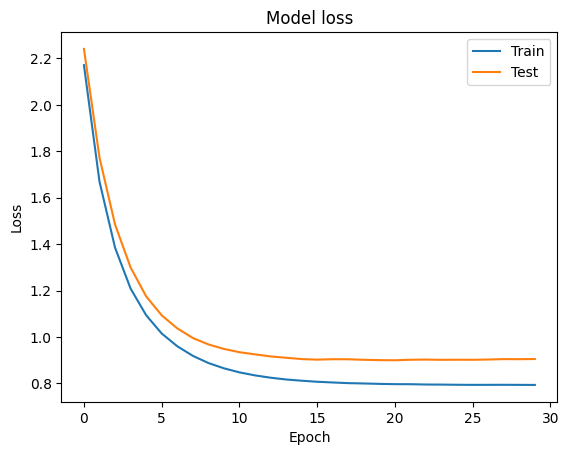

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


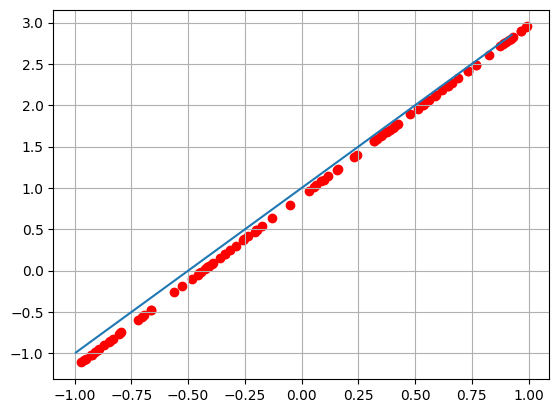

In [19]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)


print(model.get_weights())


# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### <span style="color:blue"> Esercizio 11.2 </span>

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

#### Svolgimento

Si sono effettuate diverse prove per cercare di trovare la rete migliore per fittare il polinomio: 
$$
f(x)=4-3x-2x^2+3x^3
$$
in $x \in [-1,1]$. In ogni prova si sono utilizzati 4000 dati di train e 400 dati di test, con un rumore $\sigma=0.5$ e utilizzando 80 epoche. Tutti i neuroni utilizzati sono fully connected (densi), utilizzano il sgd (stochastic gradient descent) come ottimizzatore e la MSE (mean squared error) come funzione di costo e metrica.

Una volta selezionata la rete neurale migliore tra quelle proposte, si è provato a generare il fit del polinomio in un intervallo più ampio. Come da aspettative, la soluzione proposta dalla rete è del tutto sbagliata e questo è dovuto al fatto che essa non è stata allenata al di fuori dell'intervallo iniziale

---

#### 1. <b>La prima rete proposta utilizza un layer da 10 neuroni densi con una funzione di attivazione di tipo relu. Essa genera un fit soddisfacente, eccetto per le zone di curvatura della funzione. </b>

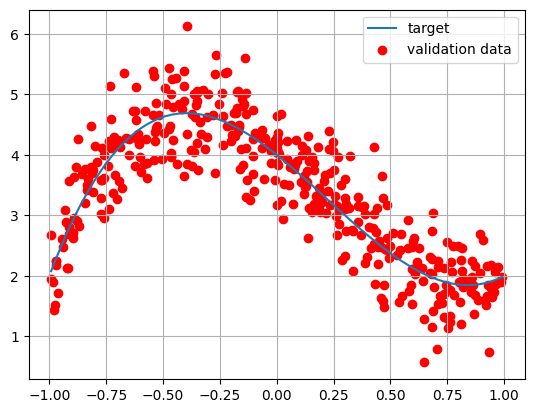

In [20]:
# target parameters of f(x) = a + bx + cxx+ dxxx
a=4
b=-3
c=-2
d=3

import numpy as np

def function(a,b,c,d,x):
    return a+b*x+c*x*x+d*x*x*x

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 4000)
x_valid = np.random.uniform(-1, 1, 400)
x_valid.sort()
y_target = function(a,b,c,d,x_valid) # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(function(a,b,c,d,x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(function(a,b,c,d,x_valid), sigma)
 # plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu")) 
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 4.5060 - mse: 4.5060 - val_loss: 0.6677 - val_mse: 0.6677
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.7151 - mse: 0.7151 - val_loss: 0.6035 - val_mse: 0.6035
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.6229 - mse: 0.6229 - val_loss: 0.5422 - val_mse: 0.5422
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.5412 - mse: 0.5412 - val_loss: 0.4772 - val_mse: 0.4772
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.5188 - mse: 0.5188 - val_loss: 0.4256 - val_mse: 0.4256
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.4377 - mse: 0.4377 - val_loss: 0.3825 - val_mse: 0.3825
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.4036 - mse: 0.4036 - val_loss: 0.3512 - val_mse: 0.3512
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.3720 - mse: 0.3720 - val_loss: 0.3285 - val_mse: 0.3285
Epoch 9/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0093 - mse: 0.0093

Test loss: 0.02169194258749485
Test accuracy: 0.02169194258749485
sigma: 0.5
N_train: 4000


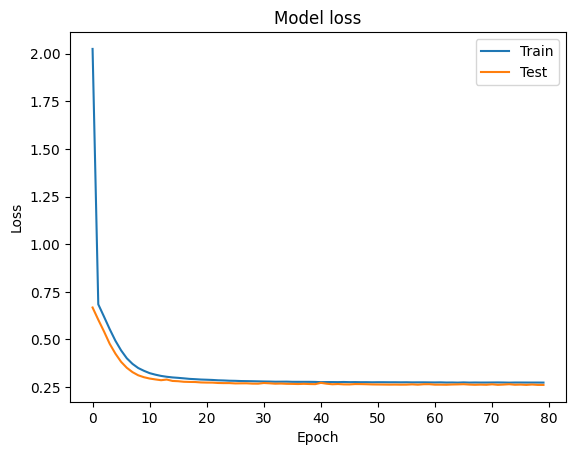

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


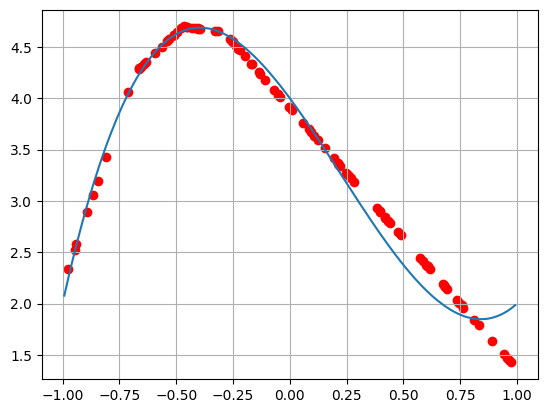

In [24]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)



# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

---

#### 2. <b>La seconda rete utilizza anch'essa un layer da 10 neuroni, questa volta scegliendo come funzione di attivazione la sigmoide. I risultati di tale rete sono molto peggiori rispetto al precedente, si procederà dunque nell'utilizzare la funzione relu.</b>

In [25]:
#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="sigmoid"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 3.2478 - mse: 3.2478 - val_loss: 1.1866 - val_mse: 1.1866
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 1.2663 - mse: 1.2663 - val_loss: 1.0243 - val_mse: 1.0243
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 1.1080 - mse: 1.1080 - val_loss: 0.9187 - val_mse: 0.9187
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 1.0004 - mse: 1.0004 - val_loss: 0.8509 - val_mse: 0.8509
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.9156 - mse: 0.9156 - val_loss: 0.8065 - val_mse: 0.8065
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.8591 - mse: 0.8591 - val_loss: 0.7828 - val_mse: 0.7828
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.8229 - mse: 0.8229 - val_loss: 0.7693 - val_mse: 0.7693
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.8246 - mse: 0.8246 - val_loss: 0.7620 - val_mse: 0.7620
Epoch 9/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.3664 - mse: 0.3664

Test loss: 0.1652524769306183
Test accuracy: 0.1652524769306183
sigma: 0.5
N_train: 4000


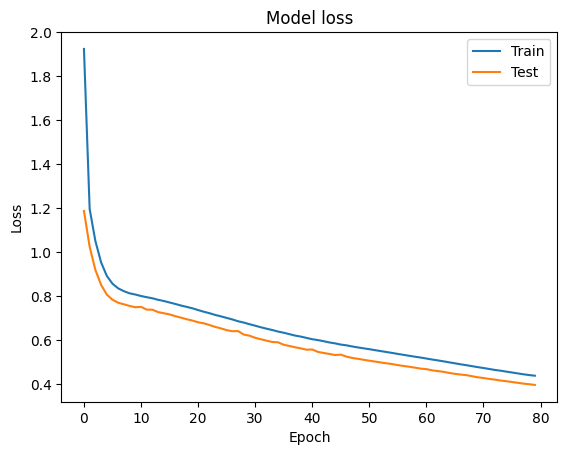

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


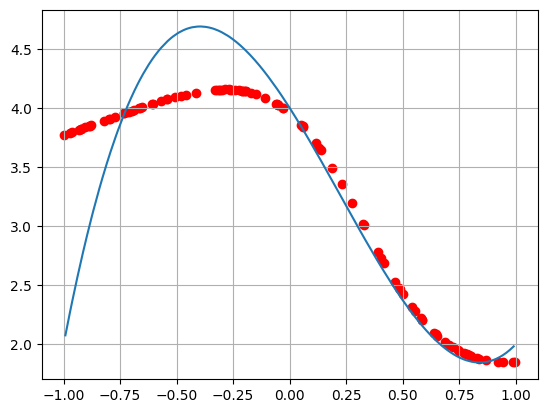

In [27]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)



# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

3. <b>La terza rete aggiunge un ulteriore layer di 5 neuroni densi con funzione relu alla prima rete. L'esito è decisamente migliore rispetto al primo caso ma ancora non si ha un buon fitting nelle zone di massima curvatura</b>

In [28]:
#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 4.5850 - mse: 4.5850 - val_loss: 0.6924 - val_mse: 0.6924
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.7356 - mse: 0.7356 - val_loss: 0.5676 - val_mse: 0.5676
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.6153 - mse: 0.6153 - val_loss: 0.4525 - val_mse: 0.4525
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.4554 - mse: 0.4554 - val_loss: 0.3617 - val_mse: 0.3617
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.3854 - mse: 0.3854 - val_loss: 0.3114 - val_mse: 0.3114
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.3302 - mse: 0.3302 - val_loss: 0.2843 - val_mse: 0.2843
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.2849 - mse: 0.2849 - val_loss: 0.2750 - val_mse: 0.2750
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.2933 - mse: 0.2933 - val_loss: 0.2686 - val_mse: 0.2686
Epoch 9/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 0.0057 - mse: 0.0057

Test loss: 0.004120271187275648
Test accuracy: 0.004120271187275648
sigma: 0.5
N_train: 4000


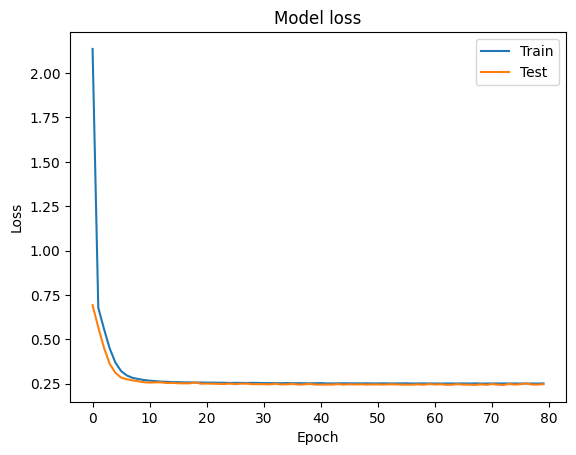

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


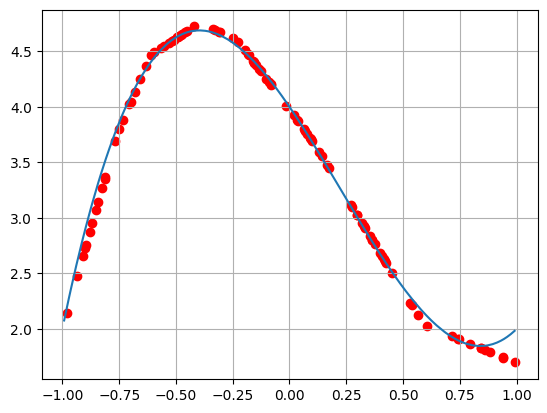

In [30]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)



# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

---

#### 4. <b>Si è deciso nuovamente di aggiungere due ulteriori strati da 5 neuroni relu, generando un ottimo risultato per il fitting del polinomio voluto e nell'intervallo richiesto. Tra le soluzioni proposte è la migliore trovata</b>

In [34]:
#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6692 - mse: 4.6692 - val_loss: 0.6618 - val_mse: 0.6618
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.6635 - mse: 0.6635 - val_loss: 0.4664 - val_mse: 0.4664
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.4510 - mse: 0.4510 - val_loss: 0.3420 - val_mse: 0.3420
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 0.3632 - mse: 0.3632 - val_loss: 0.2902 - val_mse: 0.2902
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.3155 - mse: 0.3155 - val_loss: 0.2686 - val_mse: 0.2686
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.2722 - mse: 0.2722 - val_loss: 0.2635 - val_mse: 0.2635
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.2766 - mse: 0.2766 - val_loss: 0.2556 - val_mse: 0.2556
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.2749 - mse: 0.2749 - val_loss: 0.2515 - val_mse: 0.2515
Epoch 9/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.0041 - mse: 0.0041

Test loss: 0.003980210516601801
Test accuracy: 0.003980210516601801
sigma: 0.5
N_train: 4000


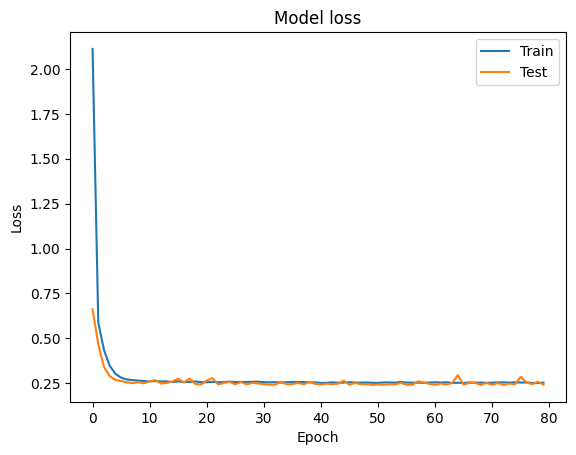

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


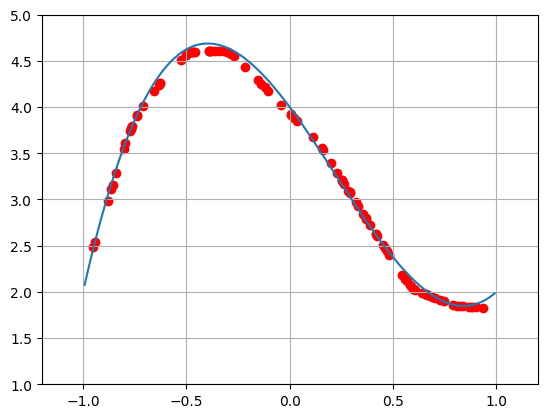

In [36]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)



# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.xlim(-1.2, 1.2)
plt.ylim(1, 5)
plt.grid(True)
plt.show()

---

#### 5. <b>Infine, si è voluto dimostrare che l'aumento della complessità della rete (aumento del numero di parametri) non si traduce automaticamente in una migliore performance nella soluzione del problema. L'ultima rete è infatti composta da 6 layers contenenti 250 neuroni l'uno e che utilizzano diverse funzioni di attivazione (relu, tanh e sigmoide). Come è possibile osservare, la funzione di costo ha un andamento leggermente oscillante e il risultato del fit è di gran lunga peggiore rispetto al caso precedente.</b>

In [42]:
#inizializzo la rete

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(250, input_shape=(1,),activation="relu"))
model.add(Dense(250, input_shape=(1,),activation="relu"))
model.add(Dense(250, input_shape=(1,),activation="tanh"))
model.add(Dense(250, input_shape=(1,),activation="elu"))
model.add(Dense(250, input_shape=(1,),activation="sigmoid"))
model.add(Dense(250, input_shape=(1,),activation="relu"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 250)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,501 (1.20 MB)

 Trainable params: 314,501 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=80,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2428 - mse: 2.2428 - val_loss: 1.2636 - val_mse: 1.2636
Epoch 2/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1689 - mse: 1.1689 - val_loss: 1.0494 - val_mse: 1.0494
Epoch 3/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6205 - mse: 0.6205 - val_loss: 0.4338 - val_mse: 0.4338
Epoch 4/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.3582 - val_mse: 0.3582
Epoch 5/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4624 - mse: 0.4624 - val_loss: 0.4236 - val_mse: 0.4236
Epoch 6/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3693 - mse: 0.3693 - val_loss: 0.3691 - val_mse: 0.3691
Epoch 7/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3428 - mse: 0.3428 - val_loss: 0.4441 - val_mse: 0.4441
Epoch 8/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3858 - mse: 0.3858 - val_loss: 0.2836 - val_mse: 0.2836
Epoch 9/80
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0030 - mse: 0.0030

Test loss: 0.004845289513468742
Test accuracy: 0.004845289513468742
sigma: 0.5
N_train: 4000


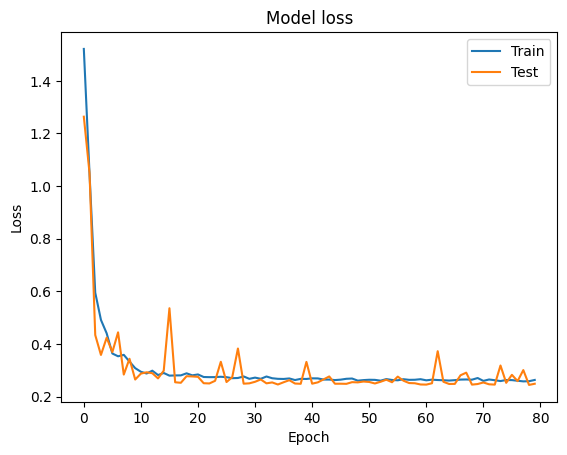

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


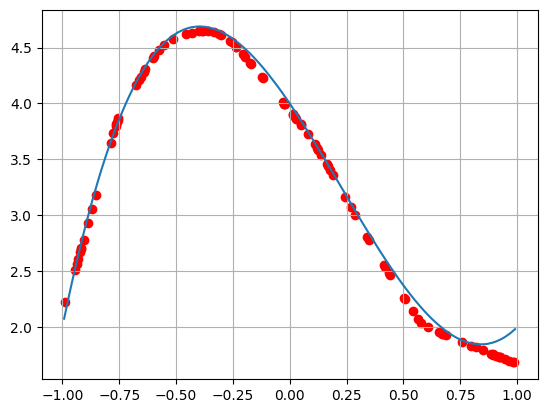

In [44]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)


import matplotlib.pyplot as plt
# print performance
print()
print('Test loss:', score[0]) #la funzione costo ovvero mse
print('Test accuracy:', score[1]) #
print("sigma:", sigma)
print("N_train:", x_train.size)



# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


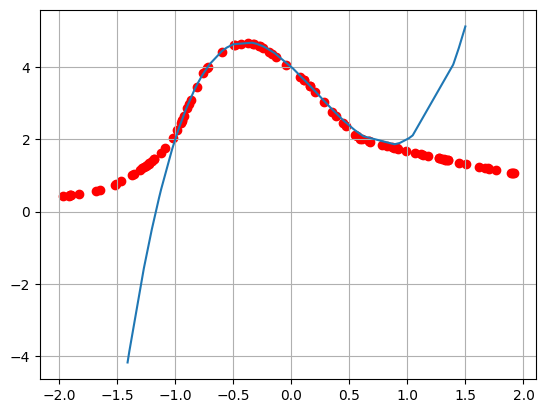

In [45]:
x_predicted = np.random.uniform(-2, 2, 100)
x_valid=np.random.uniform(-1.5,1.5,50)
x_valid.sort()
y_target = function(a,b,c,d,x_valid)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### <span style ="color:blue">Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

#### Svolgimento

La rete proposta utilizza 10000 dati di train e 1000 per il test, con un rumore $\sigma=0.1$ e utilizzando 50 epoche. Essa è strutturata in quattro layers, rispettivamente composti da 40, 38, 35 e 13 neuroni densi con funzione di attivazione tanh. Questa volta si è utilizzato il adam come ottimizzatore e la MSE come funzione di costo e metrica. 

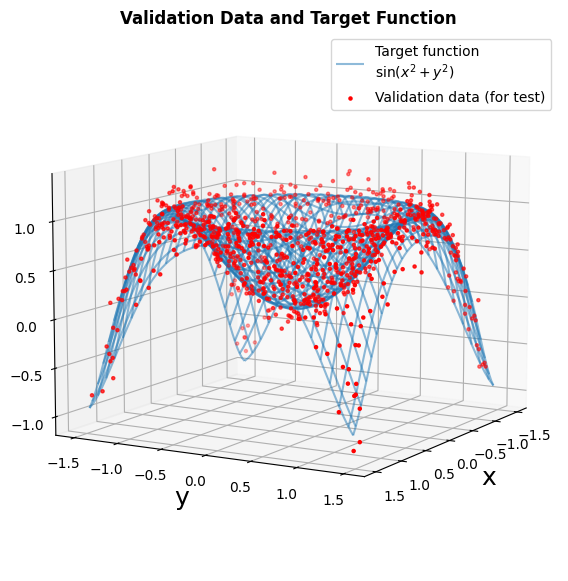

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

N_epochs = 50
N_train = 8000
N_valid = 1000
Sigma = 0.1

np.random.seed(0)
lim = 1.5

# Generate random data for training and validation
x_train = np.random.uniform(-lim, lim, N_train)
x_valid = np.random.uniform(-lim, lim, N_valid)

y_train = np.random.uniform(-lim, lim, N_train)
y_valid = np.random.uniform(-lim, lim, N_valid)

XY_train = np.column_stack((x_train, y_train))
XY_valid = np.column_stack((x_valid, y_valid))

def f(x, y):
    return np.sin(x**2 + y**2)

z_target = f(x_valid, y_valid)  # Target function

sigma = Sigma
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

# Plot validation data and target dataset
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(-lim, lim, 0.05)
y_surf = np.arange(-lim, lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf, y_surf)
ax.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf),
                  rstride=2, cstride=2,
                  label='Target function\n$\\sin(x^2+y^2)$',
                  alpha=0.5)
ax.scatter(x_valid, y_valid, z_valid, marker=".", color="r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("z", fontsize=18)
plt.title("Validation Data and Target Function", fontweight="bold")
ax.legend()
ax.view_init(10, 30)

plt.show()


In [5]:
model = Sequential([
    Dense(40, input_shape=(2,), activation='tanh'),
    Dense(38, activation='tanh'),
    Dense(35, activation='tanh'),
    Dense(13, activation='tanh'),
    Dense(1, activation='tanh')
])

# Print the model summary
model.summary()

# Compile the model, choosing optimizer, loss, and metrics object
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model.fit(
    x=XY_train, y=z_train, 
    batch_size=32, epochs=N_epochs,
    shuffle=True,
    validation_data=(XY_valid, z_valid)
)


/home/rix/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1752610632.327759   73666 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752610632.328179   73666 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         1,558 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │         1,365 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,525 (13.77 KB)

 Trainable params: 3,525 (13.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.2340 - mse: 0.2340 - val_loss: 0.1571 - val_mse: 0.1571
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1647 - mse: 0.1647 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 0.1577 - mse: 0.1577 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.1279 - mse: 0.1279 - val_loss: 0.0814 - val_mse: 0.0814
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.0801 - mse: 0.0801 - val_loss: 0.0544 - val_mse: 0.0544
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0458 - val_mse: 0.0458
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

TEST DATA evaluation
Test loss: 0.012818410992622375
Test accuracy: 0.012818410992622375

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


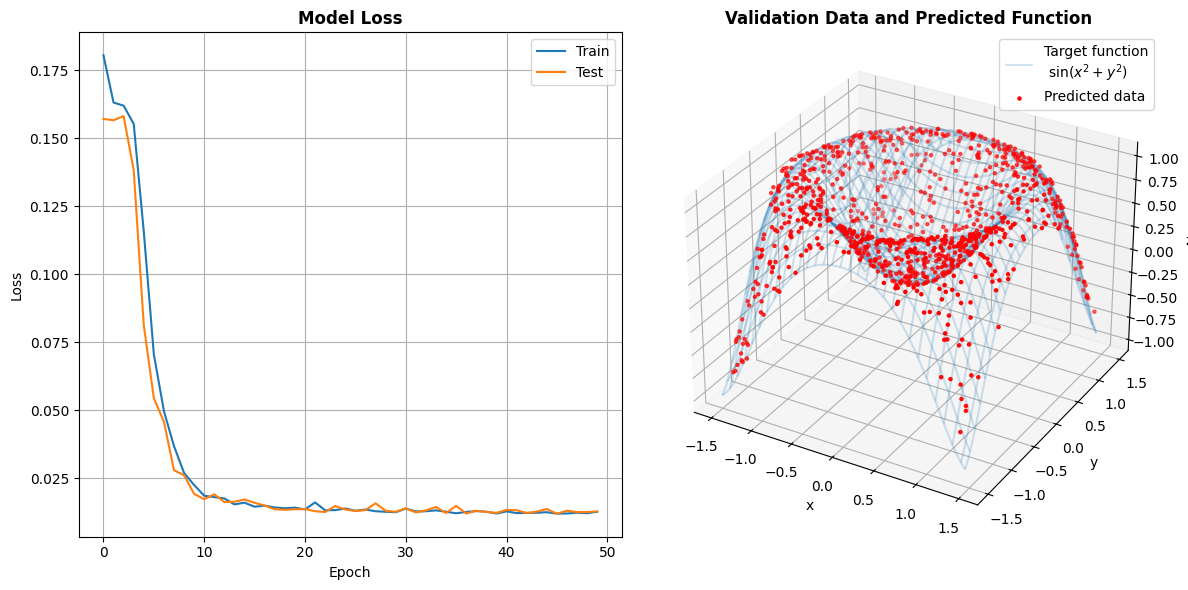

In [43]:
# Evaluate with test data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# Plot model loss and validation data
fig = plt.figure(figsize=(12, 6))

# Plot model loss
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss', fontweight='bold')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')
ax1.grid()

# Remove the existing subplot to avoid the warning
#if len(ax2.figure.axes) > 0:
#    ax2.figure.axes[-1].remove()

# Generate predicted data
x_predicted = np.random.uniform(-lim, lim, 1000)
y_predicted = np.random.uniform(-lim, lim, 1000)
XY_predicted = np.column_stack((x_predicted, y_predicted))
z_predicted = model.predict(XY_predicted).flatten()

# Plot validation data and predicted function
ax2 = plt.subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(X_surf, Y_surf, f(X_surf, Y_surf), rstride=2, cstride=2, label='Target function\n $\sin(x^2+y^2)$', alpha=0.2)
ax2.scatter(x_predicted, y_predicted, z_predicted,  marker=".", color="r", label='Predicted data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Validation Data and Predicted Function', fontweight='bold')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()
